<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/tp1/tp1_2024/TP1_Mineria_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce


# Preparacion del entorno

In [1]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/${REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'MINERIA'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 7), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 51.48 KiB | 2.34 MiB/s, done.
Resolving deltas: 100% (7/7), done.


# Librerías

In [30]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset:

In [69]:
data = pd.read_csv('/content/MINERIA/tp1_2024/dxCropRecommendation.csv')

# Información del Dataset


In [26]:
data.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cultivo
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Arroz
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Arroz
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Arroz
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Arroz
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Arroz


In [23]:
# Nombre y total de columnas
print("El dataset tiene:")
columns = data.columns
ncolumns = len(columns)
print(f"{ncolumns} columnas: {', '.join(columns)}")

# Total de filas
nrows = len(data)
print(f"{nrows} filas")

# Valores y rangos
unq_val = {col: data[col].unique() for col in data.columns}
tip_val = data.dtypes

table_data = []
for col, values in unq_val.items():
    dtype = tip_val[col]
    if len(values) > 50:
        # En caso de que haya mas de 50 datos únicos, muestro solamente los primeros 50
        values_to_display = list(values[:50])
        values_display = ', '.join(map(str, values_to_display))
    else:
        values_display = ', '.join(map(str, values))

    table_data.append([col, dtype, values_display])

# Print the table
print(tabulate(table_data, headers=["Column", "Data Type", "Unique Values"], tablefmt="grid"))

El dataset tiene:
8 columnas: Nitrogeno, Fosforo, Potasio, Temperatura, Humedad, pH, Lluvia, Cultivo
1600 filas
+-------------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column      | Data Type   | Unique Values                                                                                                                                                                     

Descripción de las columnas
* Nitrogeno: Proporcion de Nitrogeno en el suelo (mg/kg)
* Fosforo: Proporcion de Fosforo en el suelo (mg/kg)
* Potasio: Proporcion de Potasio en el suelo (mg/kg)
* Temperatura: Temperatura registrada en grados celsius
* Humedad: porcentaje de humedad registrada
* pH: valor de ph registrado en el suelo
* Lluvia: lluvia registrada en mm
* Cultivo: nombre de la semilla


# Analisis Exploratorio



### Nulos


In [28]:
data.isnull().sum()

,0
Nitrogeno,0
Fosforo,0
Potasio,0
Temperatura,0
Humedad,0
pH,0
Lluvia,0
Cultivo,0


El dataset no contiene registros con valores nulos

### Descripción de las columnas numéricas

In [29]:
data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,52.003750,53.145000,57.455625,25.627031,75.299276,6.474024,104.126884
std,35.697954,37.949247,56.440856,5.384785,20.534713,0.658380,56.235890
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267
25%,23.000000,22.750000,25.000000,22.481574,63.675620,6.034347,66.697864
50%,39.000000,47.000000,40.000000,25.662093,82.281131,6.423214,97.318949
75%,86.000000,71.000000,53.000000,28.568738,91.337228,6.873499,117.947585
max,120.000000,145.000000,205.000000,43.675493,99.981876,8.868741,298.560117


### Outliers

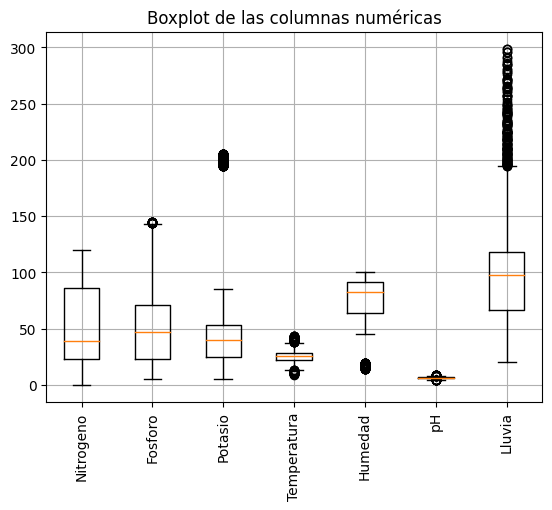

In [43]:
# Now you can create the boxplot.
fig, ax = plt.subplots()
ax.boxplot(data.iloc[:, :-1])
plt.xticks(range(1, len(data.columns)), data.iloc[:, :-1].columns, rotation=90)

plt.title("Boxplot de las columnas numéricas")
plt.grid(True)
plt.show()

Segun el gráfico superior, todas las variables numéricas tienen valores atípicos excepto los valores de Nitrógeno. A continuación estudiaré la distribución de las variables numéricas.

In [58]:
columnas_numericas = data.select_dtypes(['int', 'float']).columns
from scipy import stats
for num_col in columnas_numericas:
    _, pval = stats.normaltest(data[num_col])
    if(pval < 0.05):
        print(f"Columna {num_col} no sigue una distribución normal. P-value: {pval}")

Columna Nitrogeno no sigue una distribución normal. P-value: 0.0
Columna Fosforo no sigue una distribución normal. P-value: 1.3109037846248255e-37
Columna Potasio no sigue una distribución normal. P-value: 2.6232179657523847e-117
Columna Temperatura no sigue una distribución normal. P-value: 4.9403553135254025e-12
Columna Humedad no sigue una distribución normal. P-value: 4.24078863412994e-80
Columna pH no sigue una distribución normal. P-value: 1.3792768490363843e-10
Columna Lluvia no sigue una distribución normal. P-value: 4.343708122701068e-56


Con un nivel de confianza del 95% descartamos la normalidad para las variables

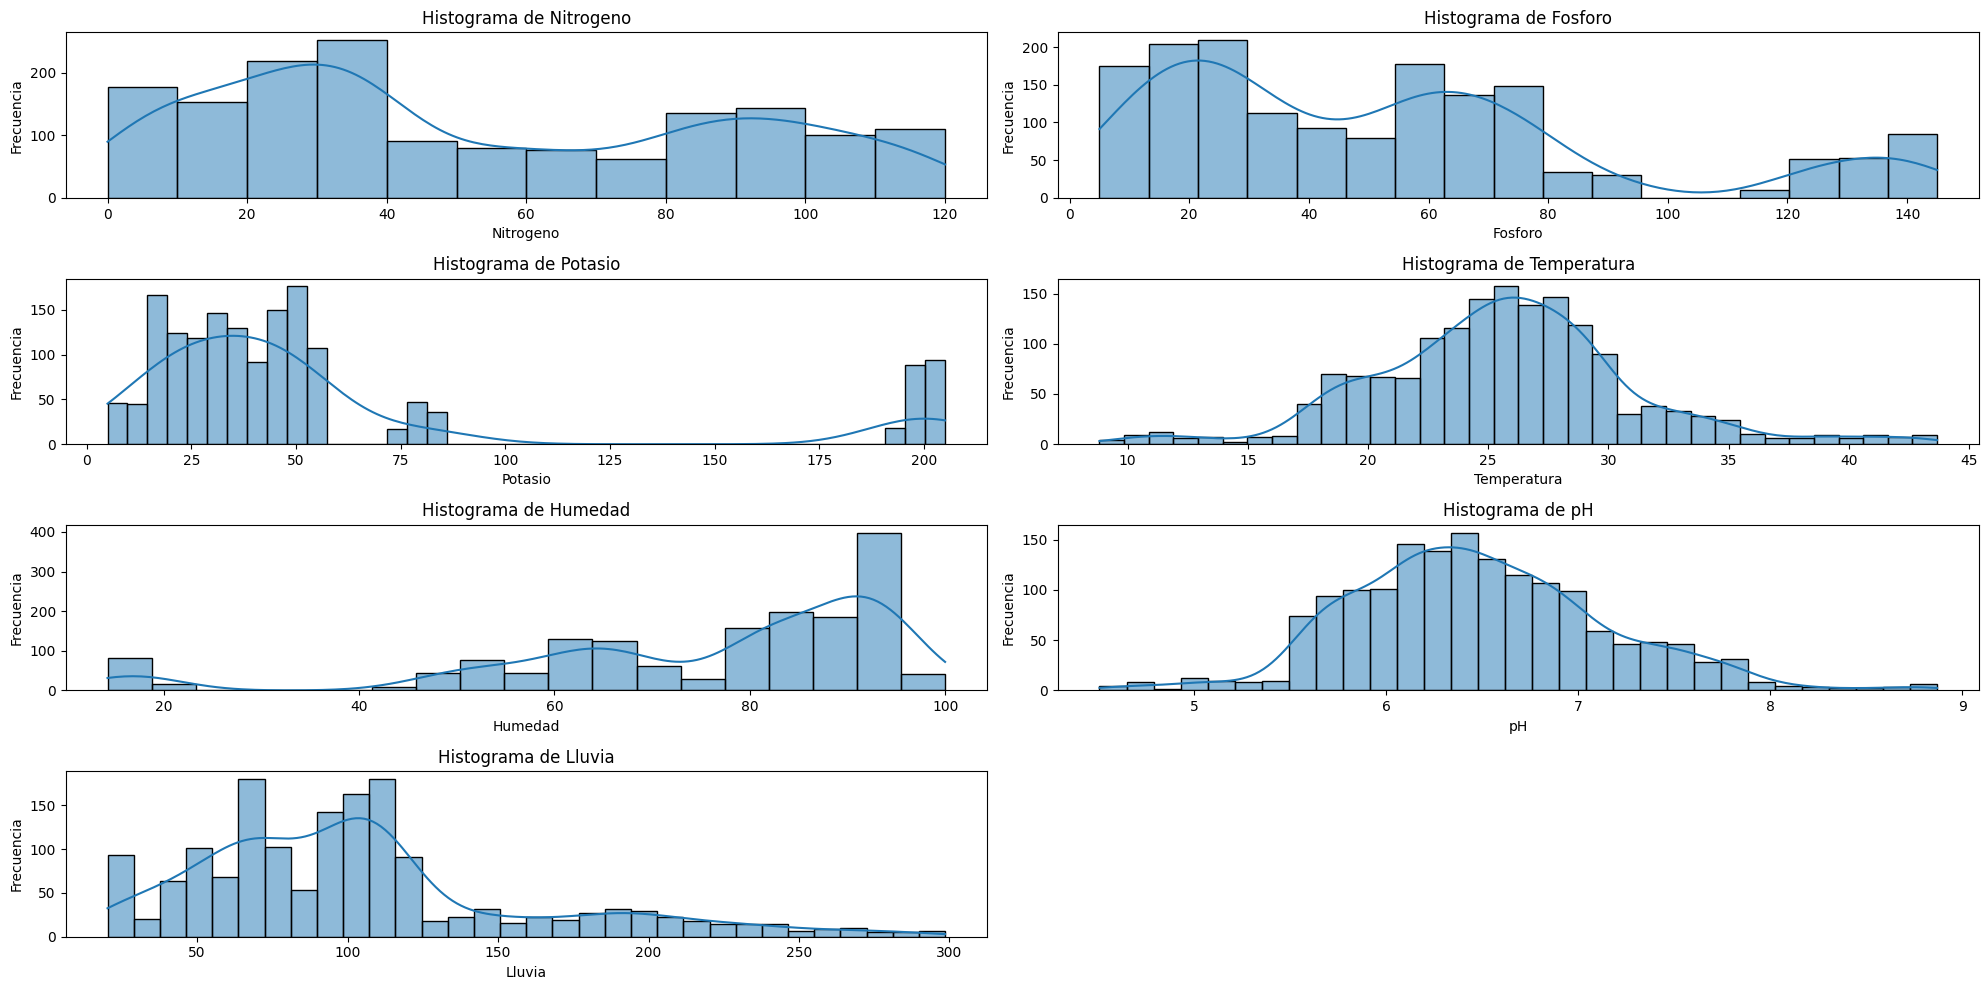

In [60]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.iloc[:,:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Observando los gráficos de arriba, las distribuciones de pH y temperatura concentran la mayoría de los datos en en centro. La distribución de la lluvia es asimetrica hacia la derecha mientras que la de la humedad es asimentrica hacia la izquierda.

## Correlación de las variables por semilla

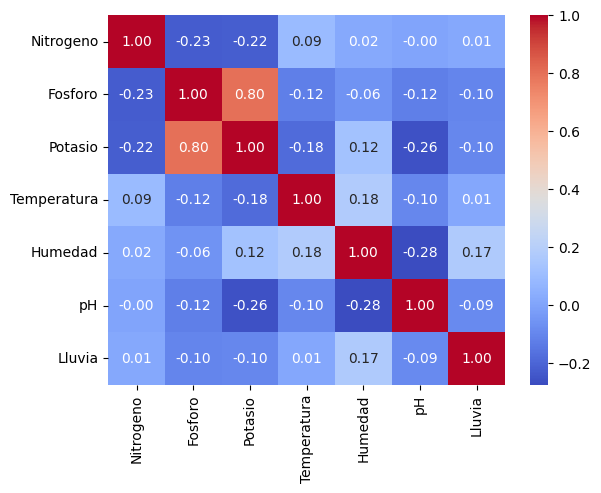

In [64]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### AGREGAR MAS DE ESTO

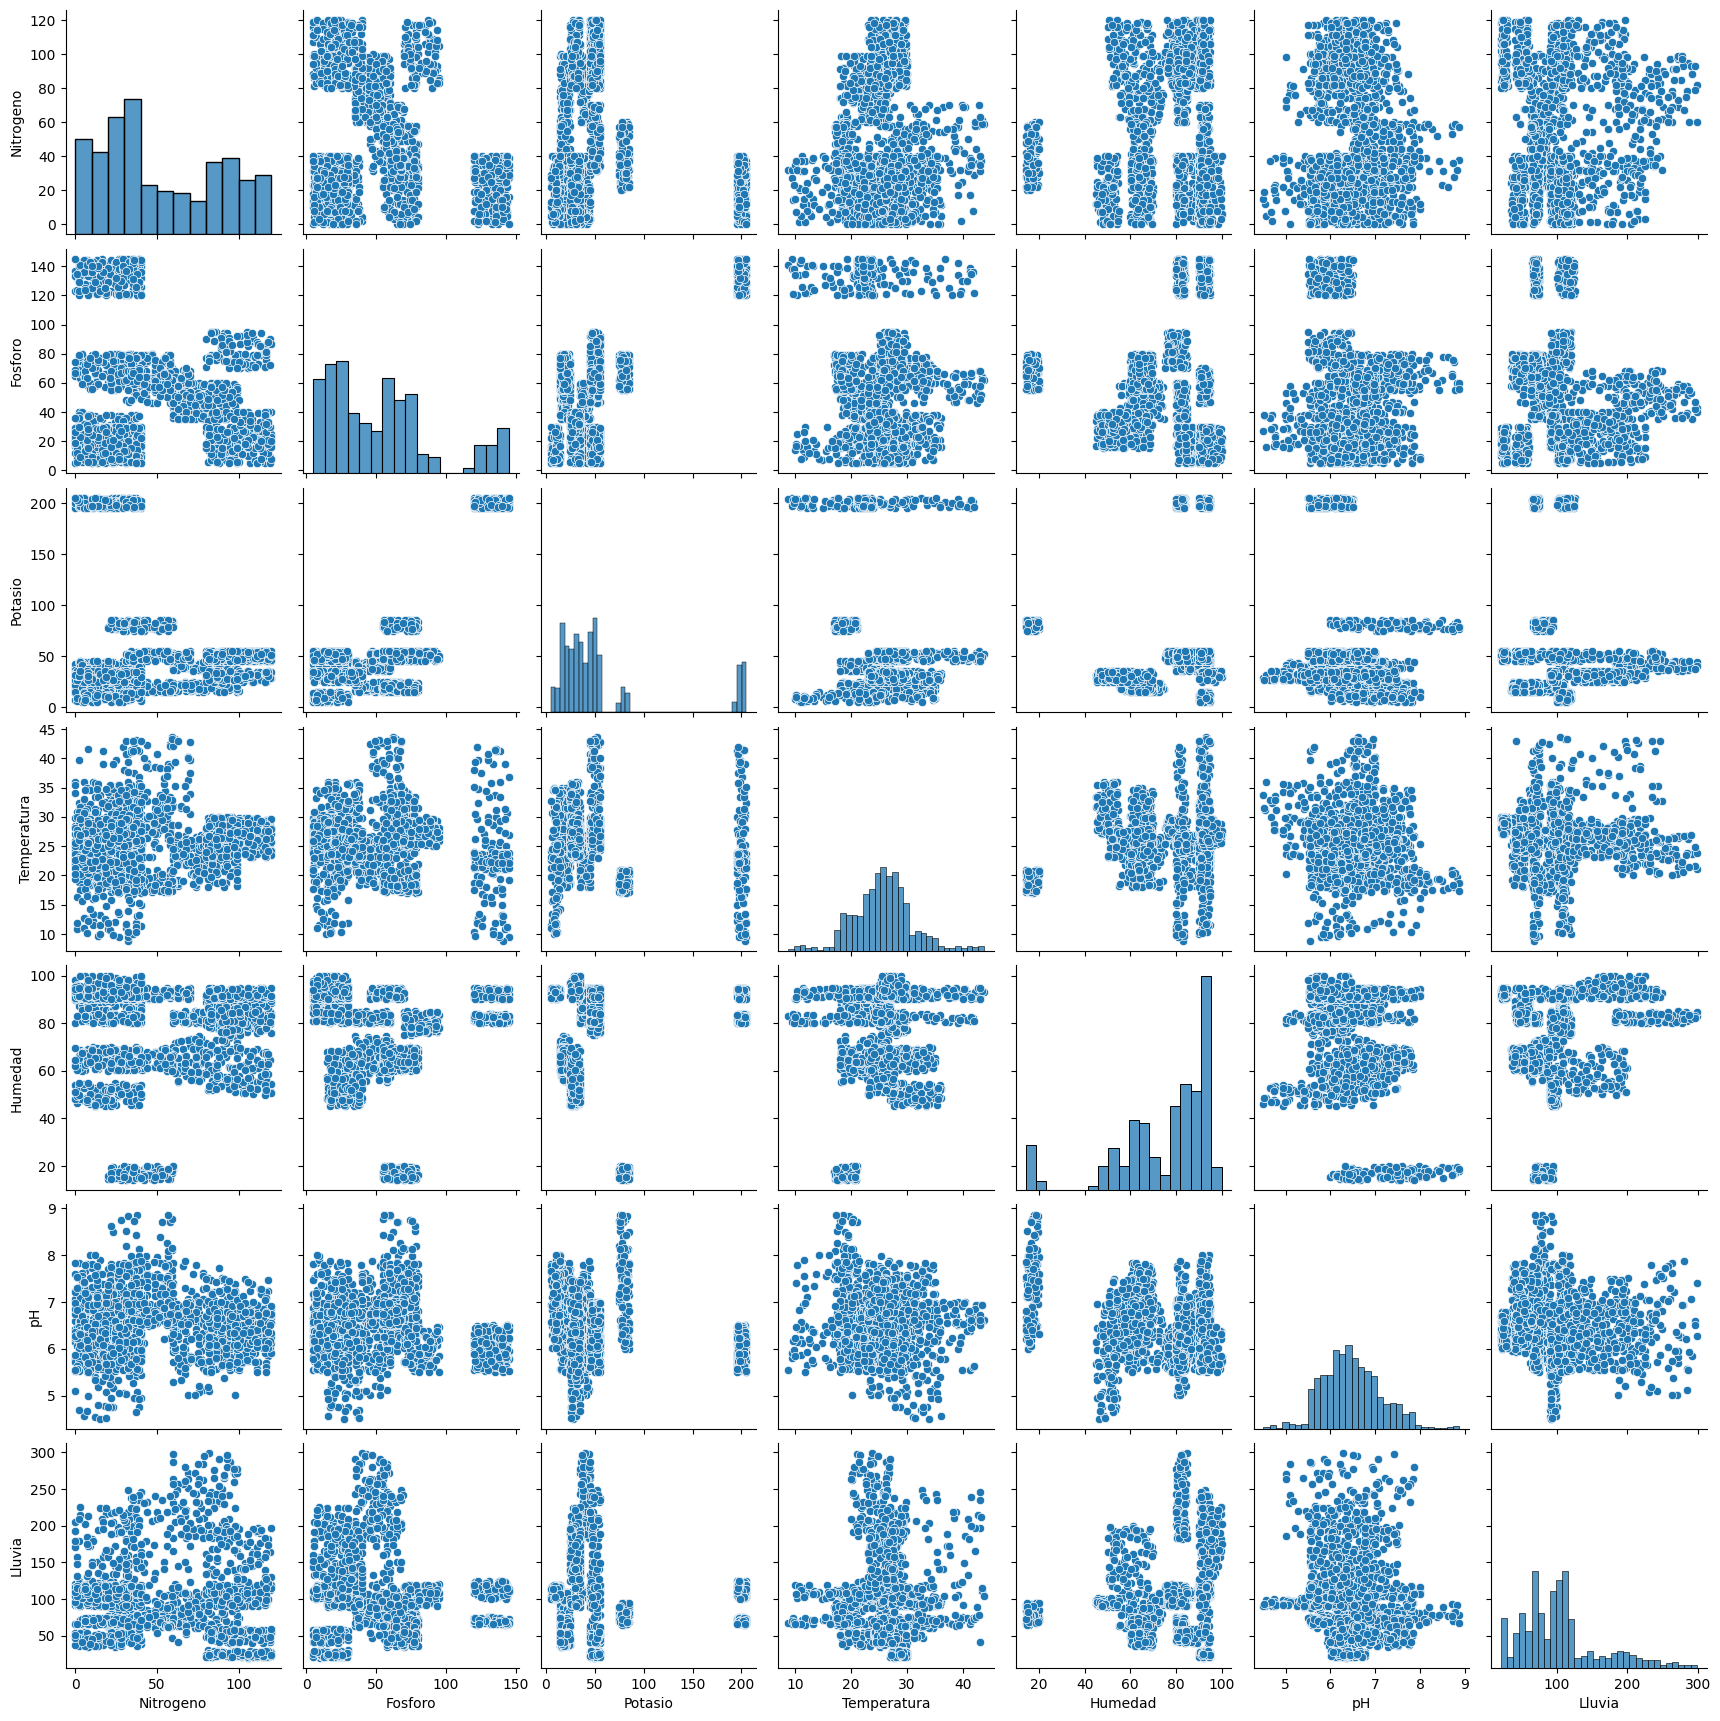

In [66]:
sns.pairplot(data)
plt.show()

## Estandarización
Los datos serán normalizados mediante la tecnica de Z-Score:
Esta tecnica escala cada feature restando su media y la divide por su desvio estandar, esto genera que todos tengan media = 0 y desvio estandar = 1

In [75]:
data_num = data.drop(columns=['Cultivo'])
std_data = (data_num - data_num.mean()) / data_num.std()

In [76]:
std_data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,8.881784e-17,-7.993606e-17,7.105427e-17,-4.085621e-16,-7.105427e-17,-9.769963e-16,8.881784e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.456771e+00,-1.268668e+00,-9.293910e-01,-3.120153e+00,-2.972588e+00,-2.986876e+00,-1.492208e+00
25%,-8.124765e-01,-8.009382e-01,-5.750378e-01,-5.841378e-01,-5.660491e-01,-6.678163e-01,-6.655718e-01
50%,-3.642716e-01,-1.619268e-01,-3.092729e-01,6.511365e-03,3.400026e-01,-7.717530e-02,-1.210603e-01
75%,9.523305e-01,4.704968e-01,-7.894326e-02,5.463000e-01,7.810166e-01,6.067526e-01,2.457630e-01
max,1.904766e+00,2.420470e+00,2.614141e+00,3.351752e+00,1.201994e+00,3.637284e+00,3.457458e+00


# PCA